# Evaluation Project 8 - Customer Churn Analysis

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, metrics, model_selection
import joblib

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
df = pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Dataset Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
<br><br>
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
<br><br>
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.
<br><br>
Problem: Examine customer data with the aim of building and comparing customer churn prediction models

#### Predicting Churn (Yes or No) is a classification problem, hence, we will be using classification models for our prediction.

## EDA

In [6]:
df.shape

(7043, 21)

In [8]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

`20 features and 1 target variable`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- `no null values identified in the dataset`
- `mix of numerical and categorical information - most columns have object data type`

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

`It is evident from the unique value information above that TotalCharges has 11 records that have blanks`

In [14]:
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- `Filling blanks with NaN to present Null values`
- `converting the column to float data type as it has int and object`
- `replacing the null values with mean as it is the total value of charges`

In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [18]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`Fixed all hidden null values present in the dataset`

In [20]:
df.nunique().to_frame("Unique Value Count")

,Unique Value Count
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


`It appears all customers have a unique customer ID and it is acting as an index, so we can drop the column`

In [21]:
df.drop("customerID",axis=1,inplace=True)

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.shape

(7043, 20)

In [24]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

- `There are 5174 records with no customer churn, i.e. the customer continued with the services`
- `There are 1869 records with customer churn, i.e. the customer left the services`
- `There is clear imbalance in the dataset that will need to fixed using SMOTE`

In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- `no missing values present in the numerical info`
- `mean > median in tenure and total charges implying right skew`
- `mean < median in monthly charges, implying left skew`
- `on comparison of 75% and max, we can infer the presence of outliers`

## Data Visualization

In [26]:
# categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)

Categorical Columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [27]:
# numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


No     5174
Yes    1869
Name: Churn, dtype: int64


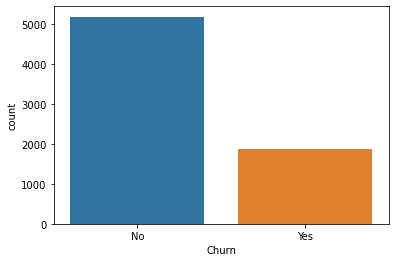

In [28]:
print(df['Churn'].value_counts())
sns.countplot(df['Churn'])
plt.show()

`As highlighted above, customers churned are lesser in comparison to those who did not churn, implying imbalance`

Male      3555
Female    3488
Name: gender, dtype: int64


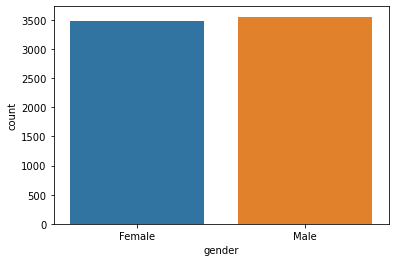

In [30]:
print(df['gender'].value_counts())
sns.countplot(df['gender'])
plt.show()

`Number of males and female customers is almost identical`

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


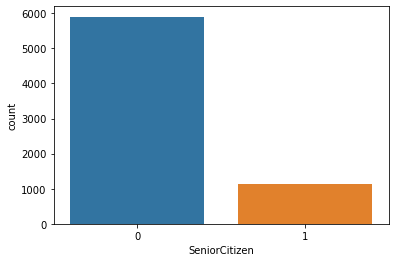

In [31]:
print(df['SeniorCitizen'].value_counts())
sns.countplot(df['SeniorCitizen'])
plt.show()

`Number of senior citizen customers is very low as compared to non-senior citizens`

No     3641
Yes    3402
Name: Partner, dtype: int64


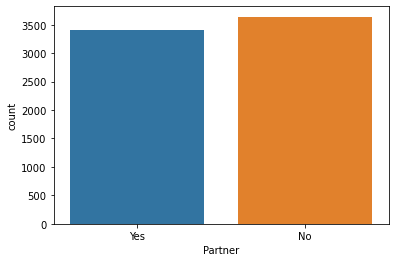

In [32]:
print(df['Partner'].value_counts())
sns.countplot(df['Partner'])
plt.show()

`Customers with partners are slightly lesser`

No     4933
Yes    2110
Name: Dependents, dtype: int64


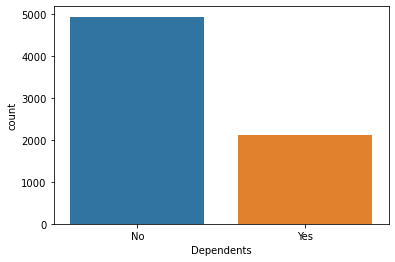

In [33]:
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'])
plt.show()

`Customers with dependents are comparatively lesser as compared to those no dependents`

Yes    6361
No      682
Name: PhoneService, dtype: int64


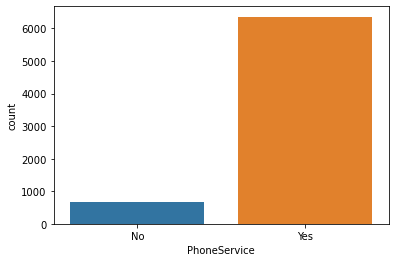

In [34]:
print(df['PhoneService'].value_counts())
sns.countplot(df['PhoneService'])
plt.show()

`Customers with no phone service are very low as compared to customers with phone service`

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


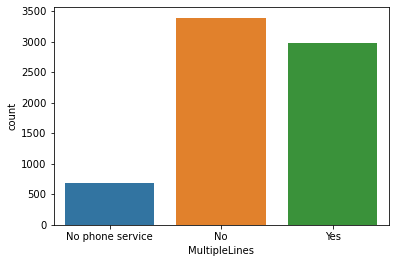

In [35]:
print(df['MultipleLines'].value_counts())
sns.countplot(df['MultipleLines'])
plt.show()

- `customers with no phone service aligns with the previous visualization on Phone Service`
- `customers with multiple phone lines are lesser in comparison to those who do not have multiple phone lines`

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


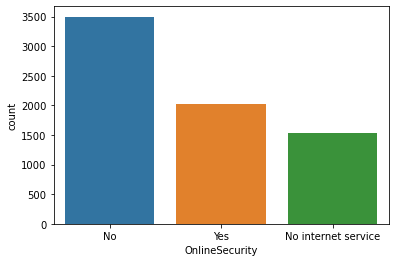

In [36]:
print(df['OnlineSecurity'].value_counts())
sns.countplot(df['OnlineSecurity'])
plt.show()

- `customers who have not opted for, or do not have internet service, have obviously no internet security`
- `however, among customers with internet connections, those who have internet security are comparatively lower in comparison to those who have no internet security`

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


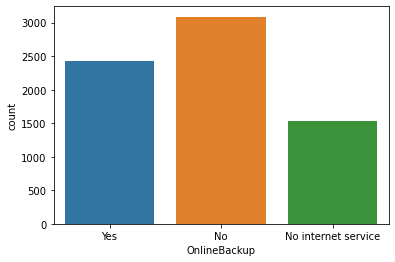

In [37]:
print(df['OnlineBackup'].value_counts())
sns.countplot(df['OnlineBackup'])
plt.show()

`Among customers who have internet services, those who do not perform online backup / have no online backup services are higher in numbers than those who do`

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


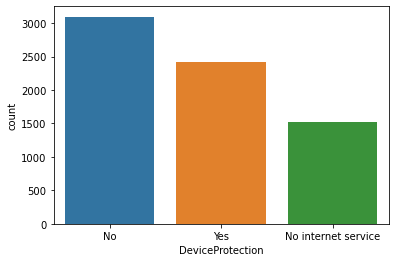

In [38]:
print(df['DeviceProtection'].value_counts())
sns.countplot(df['DeviceProtection'])
plt.show()

`Among customers who have internet services, those who do not have device protection are higher in numbers than those who do`

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


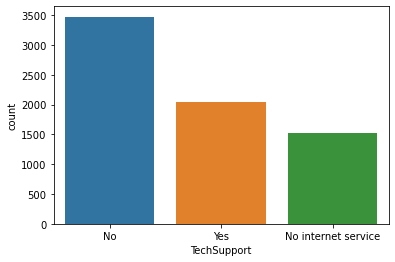

In [39]:
print(df['TechSupport'].value_counts())
sns.countplot(df['TechSupport'])
plt.show()

`Among customers who have internet services, those who do not use / need tech support are higher in numbers than those who do`

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


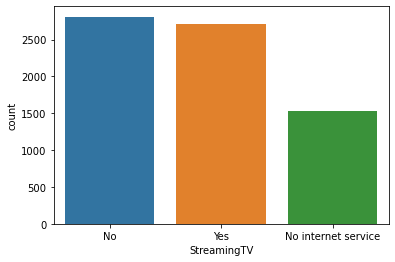

In [40]:
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"])
plt.show()

`Among customers who have internet services, those who do not stream TV shows are slightly higher in numbers than those who do`

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


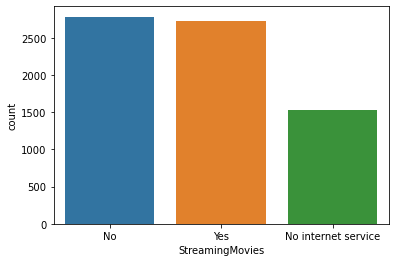

In [41]:
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"])
plt.show()

`Among customers who have internet services, those who do not stream movies and those who do are almost equal in numbers`

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


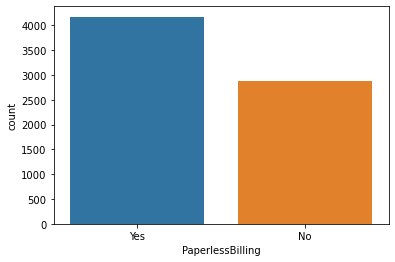

In [42]:
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"])
plt.show()

`Customers who have opted for paperless billing are much higher in number compared to customers who still choose printed bills`

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


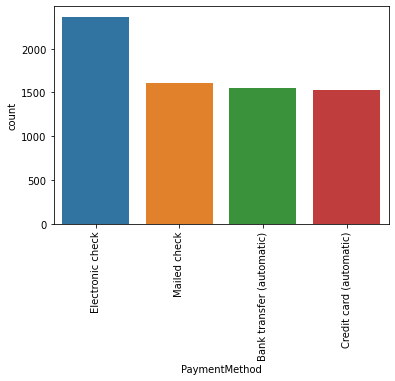

In [43]:
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"])
plt.xticks(rotation=90)
plt.show()

`Customers using e-check as a payment method are higher compared to the other modes of payments used by customers, including mailed check, auto bank transfer and auto credit card payment, which are all almost equal in number`

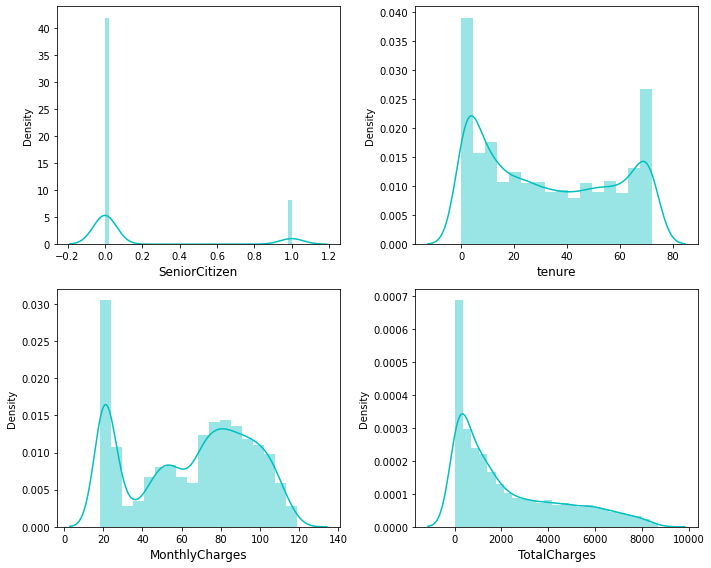

In [44]:
plt.figure(figsize=(10,8))
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color="c")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

- `the column senior citizen is clearly a classification, therefore does not look normal`
- `total charges are skewed to the right`
- `no skewness in monthly charges and tenure`

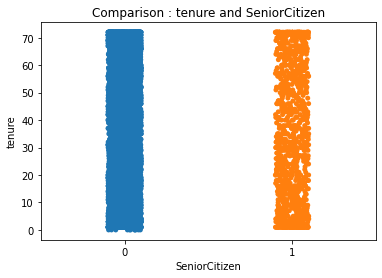

In [46]:
plt.title("Comparison : tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

`No significant comparable insights`

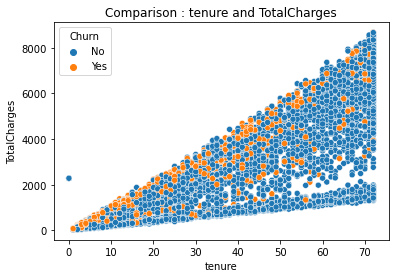

In [47]:
plt.title("Comparison : tenure and TotalCharges")
sns.scatterplot(x = 'tenure',y = 'TotalCharges',data = df,hue='Churn')
plt.show()

- `linear relationship between the features`
- `total charges increase with tenure`
- `customers with low tenure have high churn`

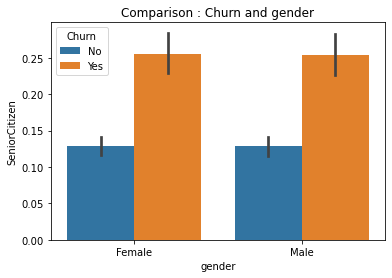

In [48]:
plt.title("Comparison : Churn and gender")
sns.barplot(x='gender',y='SeniorCitizen',data=df, hue='Churn')
plt.show()

`No significant comparable insights`

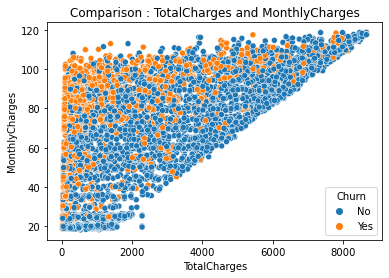

In [49]:
plt.title("Comparison : TotalCharges and MonthlyCharges")
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",data=df,hue="Churn")
plt.show()

- `linear relationship between the features`
- `high monthly charges -> high total charges -> customer churn`

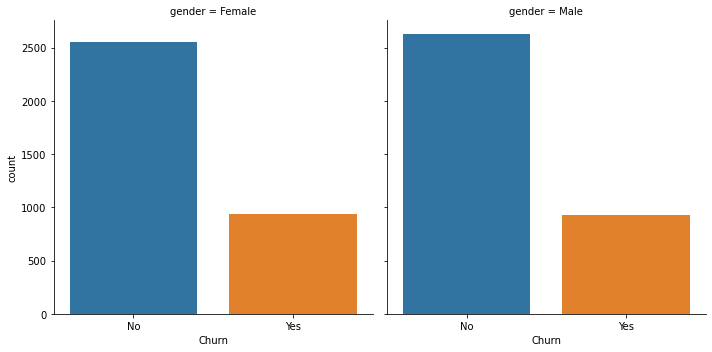

In [50]:
sns.catplot(x='Churn',col='gender',data=df,kind="count")

`No significant comparable insights`

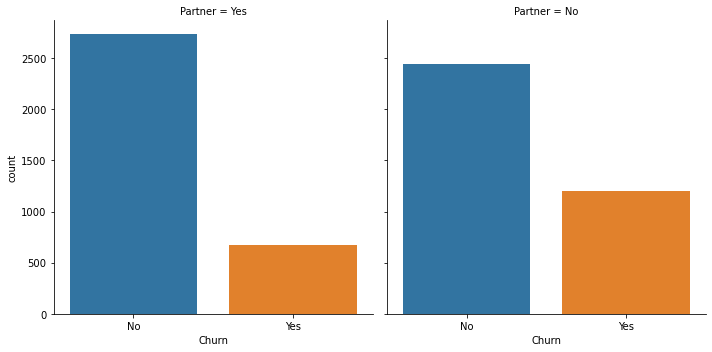

In [51]:
sns.catplot(x='Churn',col='Partner',data=df, kind="count")

`Customers who dont have partners have a higher churn`

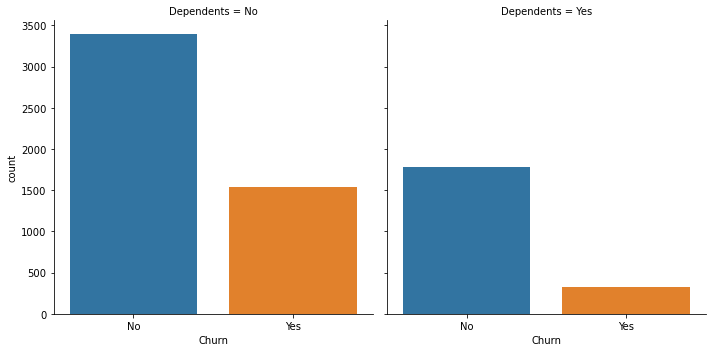

In [52]:
sns.catplot(x='Churn',col='Dependents',data=df, kind="count")

`Customers who dont have dependents have a higher churn`

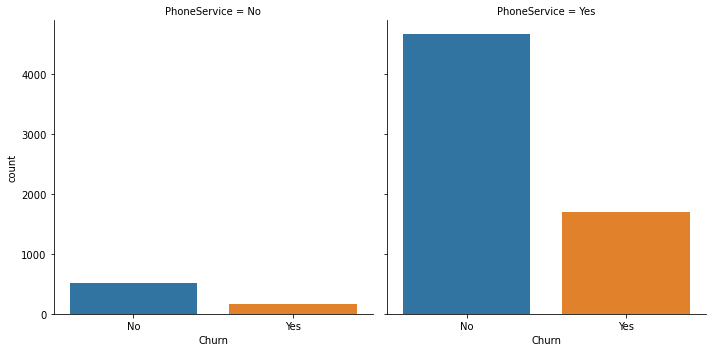

In [53]:
sns.catplot(x='Churn',col='PhoneService',data=df, kind="count")

- `Rate of churn appears to be similar whether customer has phone service or not`
- `customers who have phone service have higher numbers of churn in absolute terms`

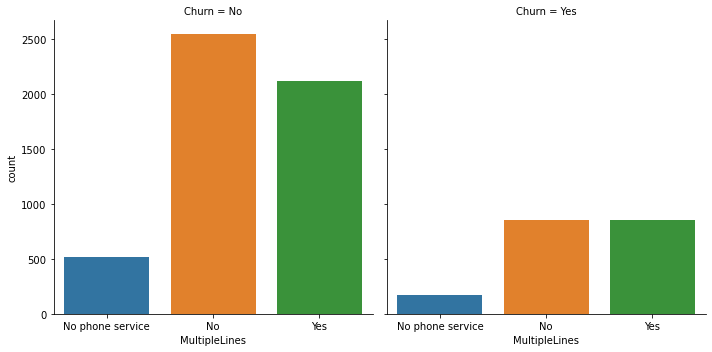

In [54]:
sns.catplot(x= 'MultipleLines',col='Churn', kind="count",data=df)

- `customers with phone services have higher churn compared to those who dont have phone services`
- `customers with multiple line churn lesser`

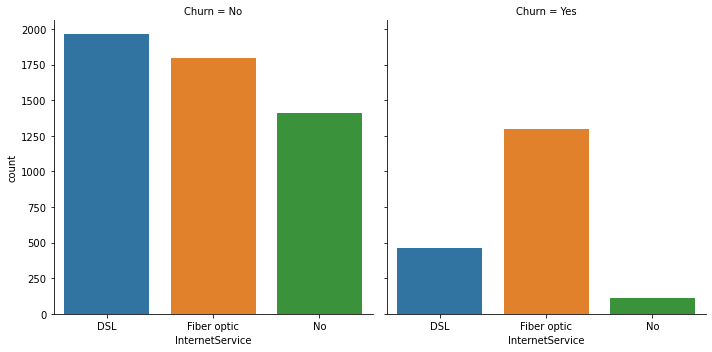

In [55]:
sns.catplot(x='InternetService',col='Churn',kind="count",data=df)

`customers with fiberoptic connect have high churn rate`

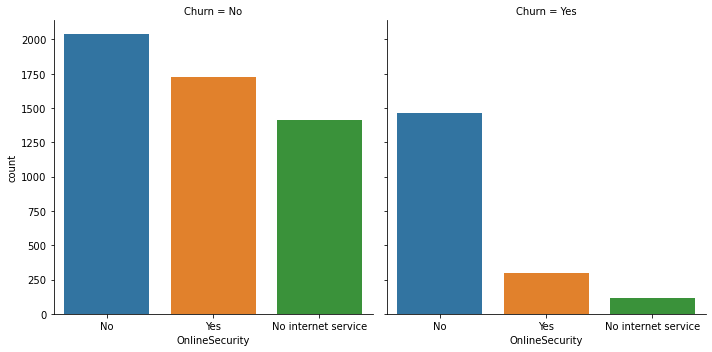

In [56]:
sns.catplot(x='OnlineSecurity',col='Churn',kind="count",data=df)

`customers with no online security have very high churn`

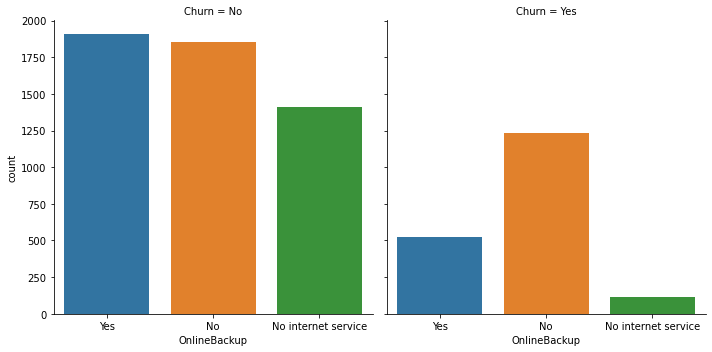

In [57]:
sns.catplot(x='OnlineBackup',col='Churn',kind="count",data=df)

`Customers with no online backup services have higher churn`

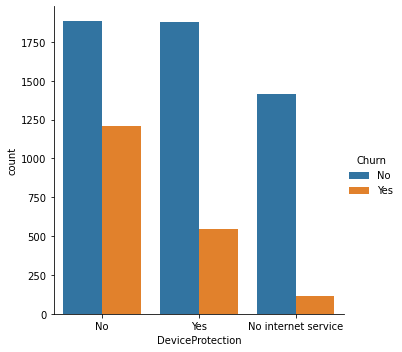

In [58]:
sns.catplot(x='DeviceProtection',hue='Churn',kind="count",data=df)

`Customers with no device protection have higher churn`

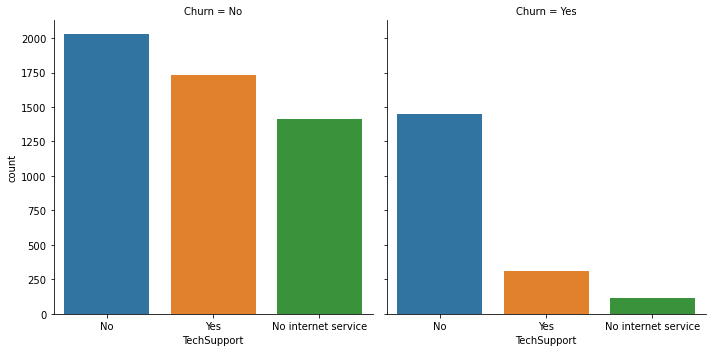

In [59]:
sns.catplot(x='TechSupport',col='Churn',kind="count",data=df)

`Customers who do not use or require tech support have higher chance of churn`

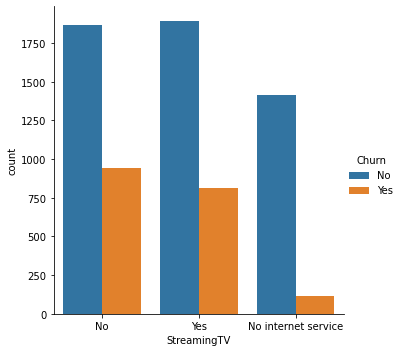

In [60]:
sns.catplot(x='StreamingTV',hue='Churn',kind="count",data=df)

`Churn is similar across customers who do, or do not, stream TV shows`

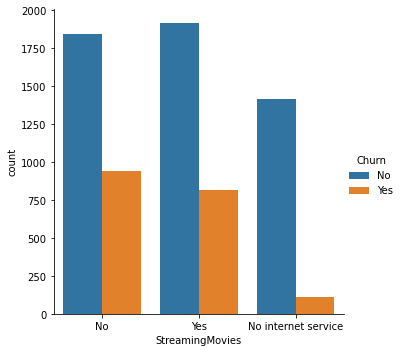

In [61]:
sns.catplot(x='StreamingMovies',hue='Churn',kind="count",data=df)

`Churn is similar across customers who do, or do not, stream movies`

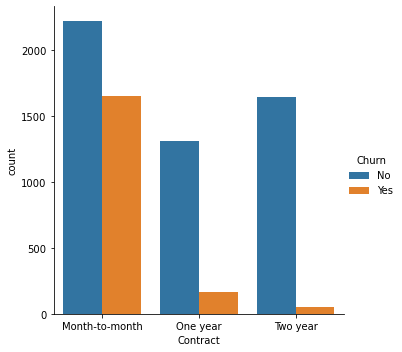

In [62]:
sns.catplot(x='Contract',hue='Churn',kind="count",data=df)

`customers with monthly contracts obviously have higher churn compared to those who have yearly / two-yearly contracts. Churn is very low among those customers who have two year contracts, and better than those who have 1 year contracts`

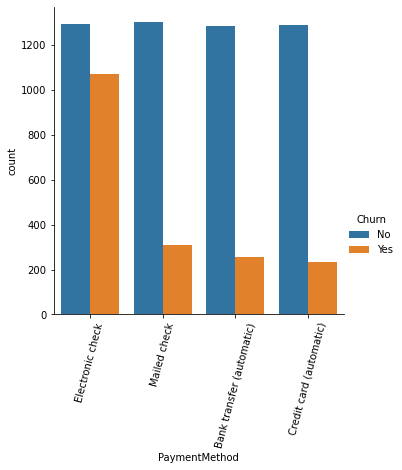

In [65]:
sns.catplot(x='PaymentMethod',hue='Churn',kind="count",data=df)
plt.xticks(rotation=75)
plt.show()

`customers preferring / using electronic checks as a payment mode have very high churn. customers using other modes of payment have almost similar churn rates in comparison`

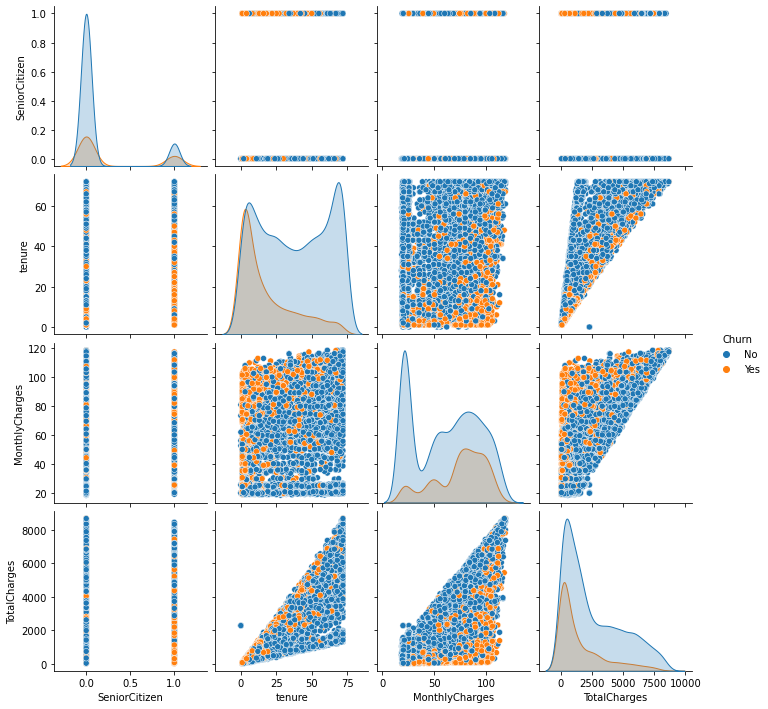

In [66]:
sns.pairplot(df,hue="Churn")
plt.show()

- `diagonals show the distribution plots`
- `tenure and monthly charges have linear relationship with total charges respectively`

## Outlier check

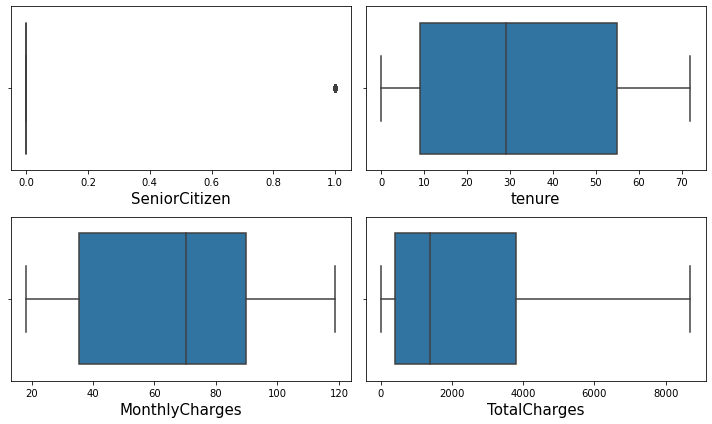

In [67]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

- `Senior Citizen is technically categorical data so no need to consider the outliers`
- `no outliers in other columns`
- `all other columns have categorical info in the dataset, so no need to check for outliers`

## Skewness Check

In [68]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

`We need to remove skewness from TotalCharges, as SeniorCitizen is categorical info`

In [69]:
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

In [70]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

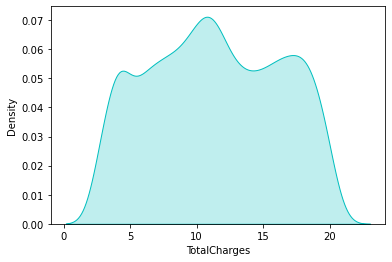

In [71]:
sns.distplot(df['TotalCharges'],color="c",kde_kws={"shade":True},hist=False)

`Skewness has been removed from TotalCharges`

## Encoding categorical data

In [72]:
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


In [73]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


`All data has been encoded and ready for assessment of correlation`

## Establishing Correlation

In [74]:
corr = df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


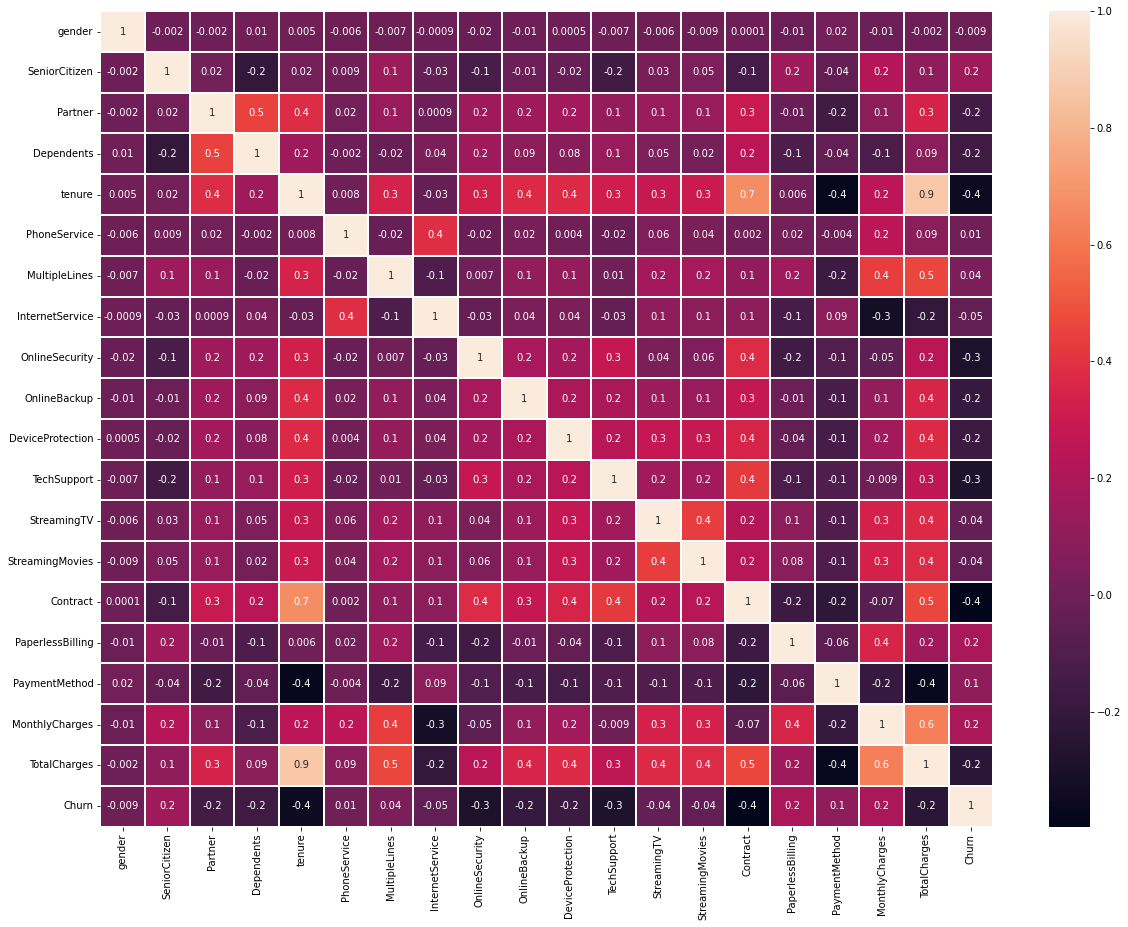

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,fmt=".1g",annot=True)
plt.yticks(rotation=0)
plt.show()

In [77]:
corr['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

**Positive Correlation with Churn:**
- senior citizen
- phone service
- multiple lines
- paperless billing
- payment method
- monthly charges

**Negative Correlation with Churn:**
- partner
- dependents
- tenure
- internet service
- online security
- online backup
- device protection
- tech support
- streaming tv
- streaming movies
- contract
- total charges

**Negligible Correlation with Churn:**
- gender (we may decide to drop it)

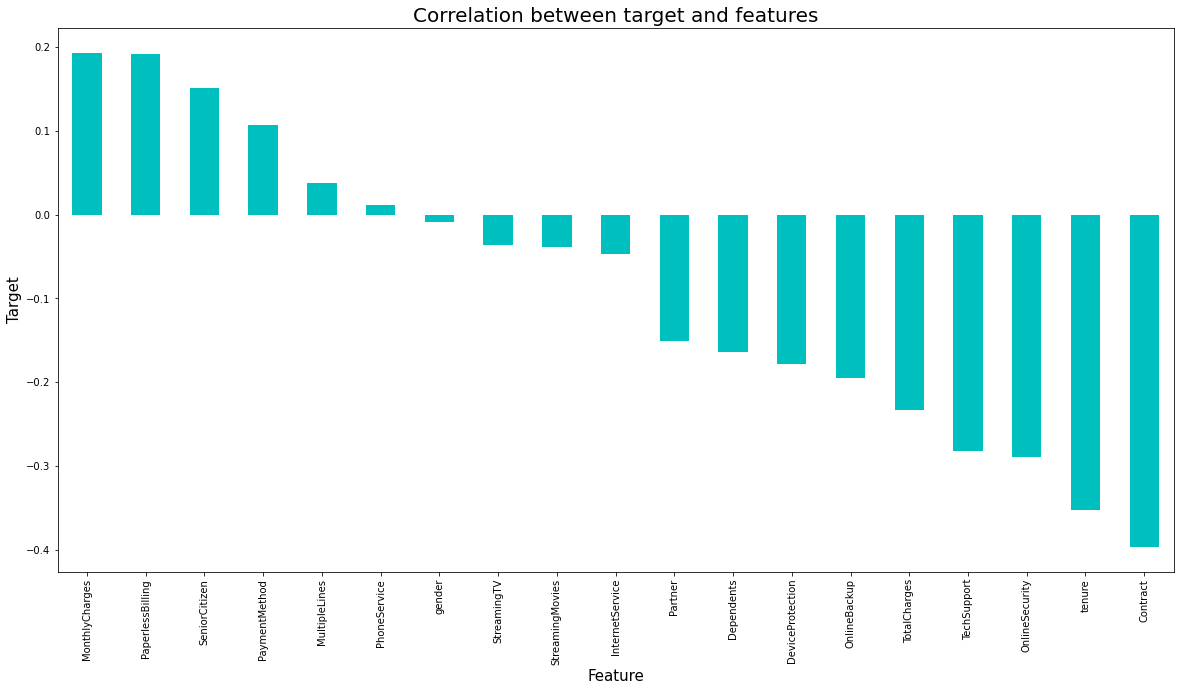

In [78]:
plt.figure(figsize=(20,10))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="c")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between target and features",fontsize=20)
plt.show()

## Feature scaling

In [79]:
x = df.drop("Churn",axis=1)
y = df["Churn"]
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


In [80]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


`Bias removed using standard scaler`

## VIF

In [81]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


## Fixing data imbalance in Target (Churn) - using SMOTE

In [82]:
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [83]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

`Data has been balanced`

## Model Building

In [85]:
# finding best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.20,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.8729468599033816 at random_state 128


In [86]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.20,random_state=maxRS)

In [87]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr= LogisticRegression()
svc =  SVC()
knn = KNeighborsClassifier()

In [88]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
svc.fit(x_train,y_train)

SVC()

In [91]:
lr.fit(x_train,y_train)

LogisticRegression()

In [92]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

#### Decision Tree

In [93]:
dt_pred = dt.predict(x_test)
accu = classification_report(y_test,dt_pred)

In [94]:
cm = confusion_matrix(y_test,dt_pred)

In [95]:
cm

array([[820, 222],
       [217, 811]], dtype=int64)

In [96]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1042
         1.0       0.79      0.79      0.79      1028

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



#### Logistic Regression

In [97]:
lr_pred = lr.predict(x_test)
accu = classification_report(y_test,lr_pred)

In [98]:
cm = confusion_matrix(y_test,lr_pred)

In [99]:
cm

array([[813, 229],
       [215, 813]], dtype=int64)

In [100]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      1042
         1.0       0.78      0.79      0.79      1028

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



#### Random Forest

In [101]:
rf_pred = rf.predict(x_test)
accu = classification_report(y_test,rf_pred)

In [102]:
cm = confusion_matrix(y_test,rf_pred)

In [103]:
cm

array([[910, 132],
       [137, 891]], dtype=int64)

In [104]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1042
         1.0       0.87      0.87      0.87      1028

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



#### SVC

In [105]:
svc_pred = svc.predict(x_test)
accu = classification_report(y_test,svc_pred)

In [106]:
cm = confusion_matrix(y_test,svc_pred)

In [107]:
cm

array([[829, 213],
       [157, 871]], dtype=int64)

In [108]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      1042
         1.0       0.80      0.85      0.82      1028

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



#### K Nearest Neighbor

In [109]:
knn_pred = knn.predict(x_test)
accu = classification_report(y_test,knn_pred)

In [110]:
cm = confusion_matrix(y_test,knn_pred)

In [111]:
cm

array([[718, 324],
       [108, 920]], dtype=int64)

In [112]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77      1042
         1.0       0.74      0.89      0.81      1028

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



#### Model Cross Validation

In [114]:
print("Cross Validation Score for Decision Tree: ",cross_val_score(dt,x,y,cv=5).mean())
print("Cross Validation Score for Logistic Regression: ",cross_val_score(lr,x,y,cv=5).mean())
print("Cross Validation Score for Random Forest: ",cross_val_score(rf,x,y,cv=5).mean())
print("Cross Validation Score for SVC: ",cross_val_score(svc,x,y,cv=5).mean())
print("Cross Validation Score for KNN: ",cross_val_score(knn,x,y,cv=5).mean())

Cross Validation Score for Decision Tree:  0.781223443377393
Cross Validation Score for Logistic Regression:  0.7816024918103215
Cross Validation Score for Random Forest:  0.8509951130444122
Cross Validation Score for SVC:  0.8101134063224549
Cross Validation Score for KNN:  0.7904932019248954


#### `Random Forest` appears to be the best model

#### ROC AUC Scores

In [115]:
print("ROC AUC Score for Decision Tree: ", roc_auc_score(y_test,dt_pred),"\n")
print("ROC AUC Score for Logistic Regression: ", roc_auc_score(y_test,lr_pred),"\n")
print("ROC AUC Score for Random Forest: ", roc_auc_score(y_test,rf_pred),"\n")
print("ROC AUC Score for SVC: ", roc_auc_score(y_test,svc_pred),"\n")
print("ROC AUC Score for KNN: ", roc_auc_score(y_test,knn_pred))

ROC AUC Score for Decision Tree:  0.7879293412100346 

ROC AUC Score for Logistic Regression:  0.785543178711995 

ROC AUC Score for Random Forest:  0.8700260274688754 

ROC AUC Score for SVC:  0.821430838629693 

ROC AUC Score for KNN:  0.792000567600469


#### `Random Forest` again appears to be the best model

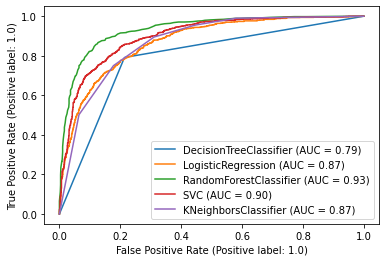

In [116]:
disp = plot_roc_curve(dt,x_test,y_test)
mod = [lr,rf,svc,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

#### `Random Forest` again appears to be the best model with SVC a close second

## Hyperparameter Tuning

In [117]:
parameter = {'n_estimators':[30,50],
             'max_depth': [10,20, 30],
             'min_samples_leaf':[3,5,10],
             'min_samples_split':[2,3,5],
             'criterion':['gini','entropy'],
             'max_features':["auto","sqrt"]
            }

In [118]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)

In [119]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [30, 50]})

In [120]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [121]:
Best_mod = RandomForestClassifier(n_estimators = 50,
                                   criterion = 'entropy', 
                                   max_depth= 20, 
                                   max_features = 'auto', 
                                   min_samples_leaf = 3, 
                                   min_samples_split = 3)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

84.92753623188406


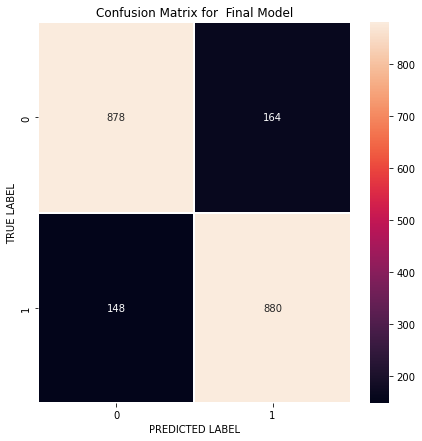

In [122]:
cm = confusion_matrix(y_test,rfpred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

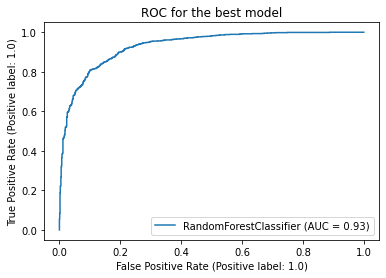

In [123]:
plot_roc_curve(Best_mod, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

## Saving the model and reloading to predict

In [124]:
joblib.dump(Best_mod,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']

In [125]:
model = joblib.load("Customer_Churn_Analysis.pkl")

prediction = model.predict(x_test)
prediction

array([1., 0., 1., ..., 0., 1., 0.])

In [126]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,1.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
2065,1.0,1.0
2066,0.0,0.0
2067,0.0,0.0
2068,1.0,0.0


# `END`